In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_csv('dataset2.csv')

In [37]:
data=data.dropna()

In [38]:
data=data.drop(['PeopleId'],axis=1)

In [39]:
#filter data if activity id is transient activities 
data_transient = data[data['activityID'] == 'transient activities']
#reduce number to 0.25 percent 
data_transient = data_transient.sample(frac=0.25)
#add data_transient back to data 
data = data[data['activityID'] != 'transient activities']
data = pd.concat([data,data_transient])


/Users/franklin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


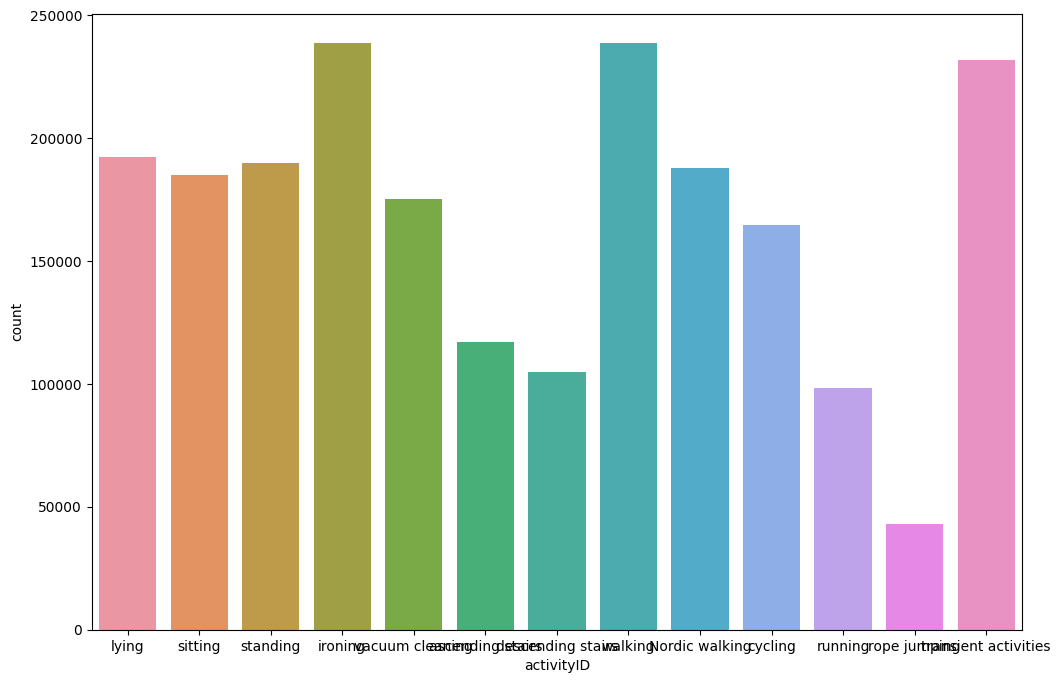

In [40]:
#plot activityID distributiom
plt.figure(figsize=(12,8))
sns.countplot(data['activityID'])
plt.show()


In [41]:
#encode activityID
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['activityID']=le.fit_transform(data['activityID'])

In [42]:
#print(data.info())
data=data.sample(frac=0.1)
y=data["activityID"]
X=data.drop(["activityID"],axis=1)
#split the data into training, validation and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [24]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#make knn classifier
knn=KNeighborsClassifier(n_neighbors=5)
#fit the classifier to the training data
knn.fit(X_train,y_train)
#predict on the test set
y_pred=knn.predict(X_test)
#evaluate the test set accuracy
accuracy=accuracy_score(y_test,y_pred)
print("KNN accuracy: ",accuracy)



KNN accuracy:  0.9529145914038001


In [34]:
import pickle
with open('knn_model.pkl', 'rb') as f:
    knn = pickle.load(f)

#use clf to make a prediction
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

0.9547885157710995


In [44]:
#knn classifier from k=1 to k=10

accuracy_scores=[]
for k in range(4,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)


[0.9569267662792843, 0.9531682346430548, 0.9485334809075816, 0.9458356391809629, 0.9421923999262128, 0.9400710201069913, 0.9372117690463014]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)

print(classification_report(y_test,y_pred))